In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [36]:

datas = ['icln', 'qcln' , 'pbd']

In [37]:
def plotter(df):
    time = pd.to_datetime(df['Date'])
    plt.figure(figsize=(50, 10)) 
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 14
    
    # Plotting the graph
    # plt.plot(time, np.asarray(v).reshape(-1,1),'k--', label='y_actual',linewidth=1, dashes=(6, 5))  # Dotted red line for y_actual
    plt.plot(time, df['first_component'], 'b', label='ymean',linewidth=1)  # Blue line for ymean
    
    
    # Adding labels and legend
    plt.xlabel('Date')
    plt.ylabel('Log-return')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2,frameon=False)
    
    plt.show()

In [38]:
def get_data_formatted(name) : 
    i_df = pd.read_csv(f"{name}_formatted.csv")
    i_df['date'] = pd.to_datetime(i_df['date'])
    i_df.rename(columns={'date': 'Date'}, inplace=True)
    return i_df

def make_pca(df,i_name='misc') : 
    date_column = pd.to_datetime(df['Date'])
    data_for_pca = df.drop(columns=['Date'])
    pca = PCA(n_components=1)
    pca_data = pd.DataFrame(data=pca.fit_transform(data_for_pca), columns=[f'first_component'])
    new_df = pd.concat([date_column, pca_data], axis=1)
    return new_df

def normalize_column(df, column_name):
    
    col_min = df[column_name].min()
    col_max = df[column_name].max()
    
    # Check if the column has constant values to avoid division by zero
    if col_max - col_min == 0:
        return df[column_name]  # If all values are the same, return the column as is
    
    # Apply min-max normalization
    normalized_column = (df[column_name] - col_min) / (col_max - col_min)
    
    return normalized_column

           Date  first_component
0    2014-01-02        23.987415
1    2014-01-03        10.213306
2    2014-01-04       -33.371654
3    2014-01-05         4.570076
4    2014-01-06        46.860780
...         ...              ...
2186 2019-12-28       -31.512095
2187 2019-12-29         7.580501
2188 2019-12-30        26.320160
2189 2019-12-31        -8.414658
2190 2020-01-01       -20.436528

[2191 rows x 2 columns]


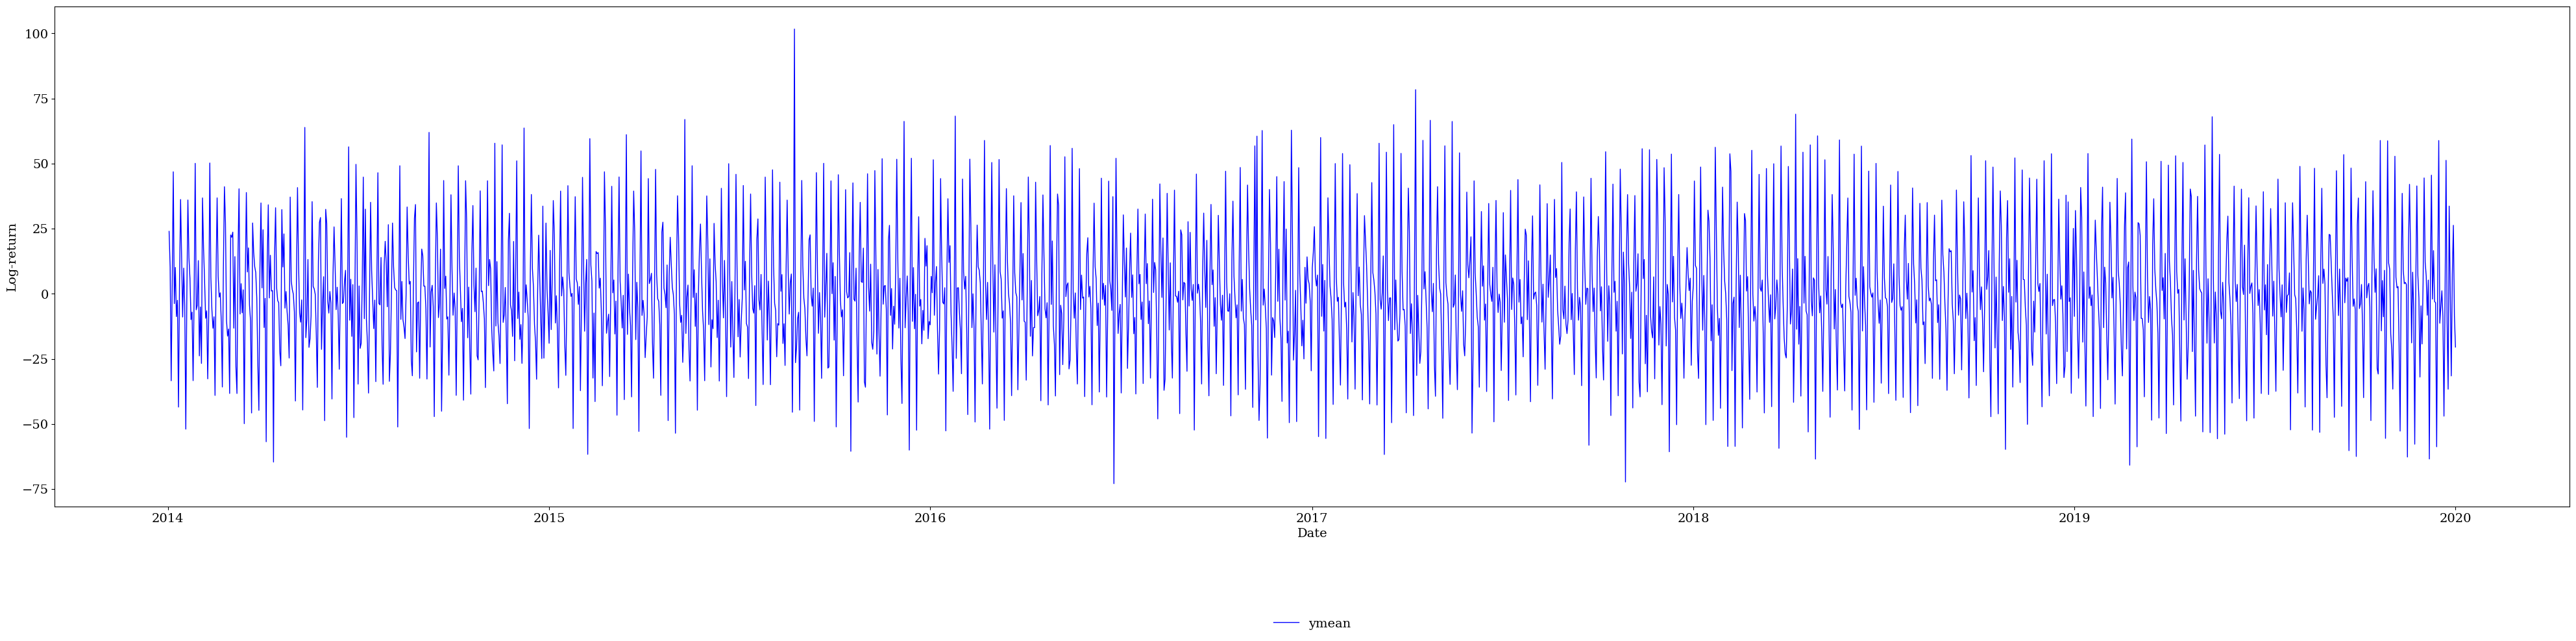

           Date  first_component
0    2014-01-02        21.616363
1    2014-01-03        -2.636643
2    2014-01-04       -26.841061
3    2014-01-05        10.325703
4    2014-01-06        30.887359
...         ...              ...
2186 2019-12-28       -36.450006
2187 2019-12-29         2.046029
2188 2019-12-30        34.105178
2189 2019-12-31         1.902555
2190 2020-01-01       -37.539349

[2191 rows x 2 columns]


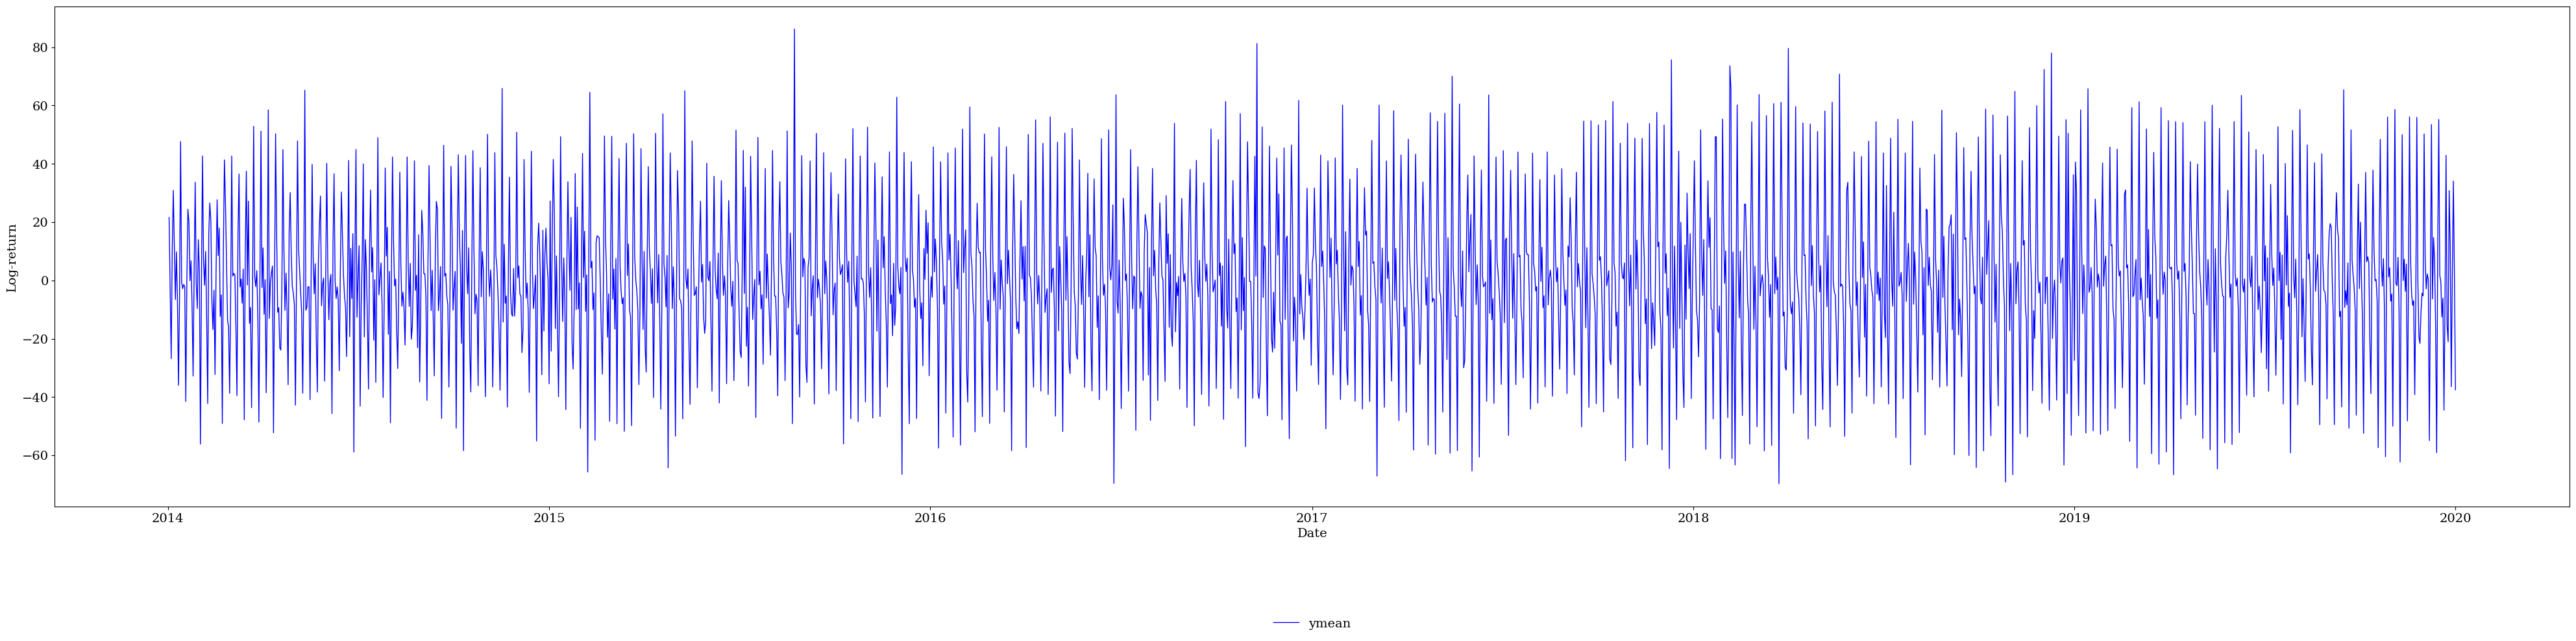

           Date  first_component
0    2014-01-02        36.445353
1    2014-01-03        -8.661371
2    2014-01-04       -21.622944
3    2014-01-05         0.364444
4    2014-01-06        44.349814
...         ...              ...
2186 2019-12-28       -33.541808
2187 2019-12-29         7.863765
2188 2019-12-30        22.232438
2189 2019-12-31        -7.337906
2190 2020-01-01       -11.675436

[2191 rows x 2 columns]


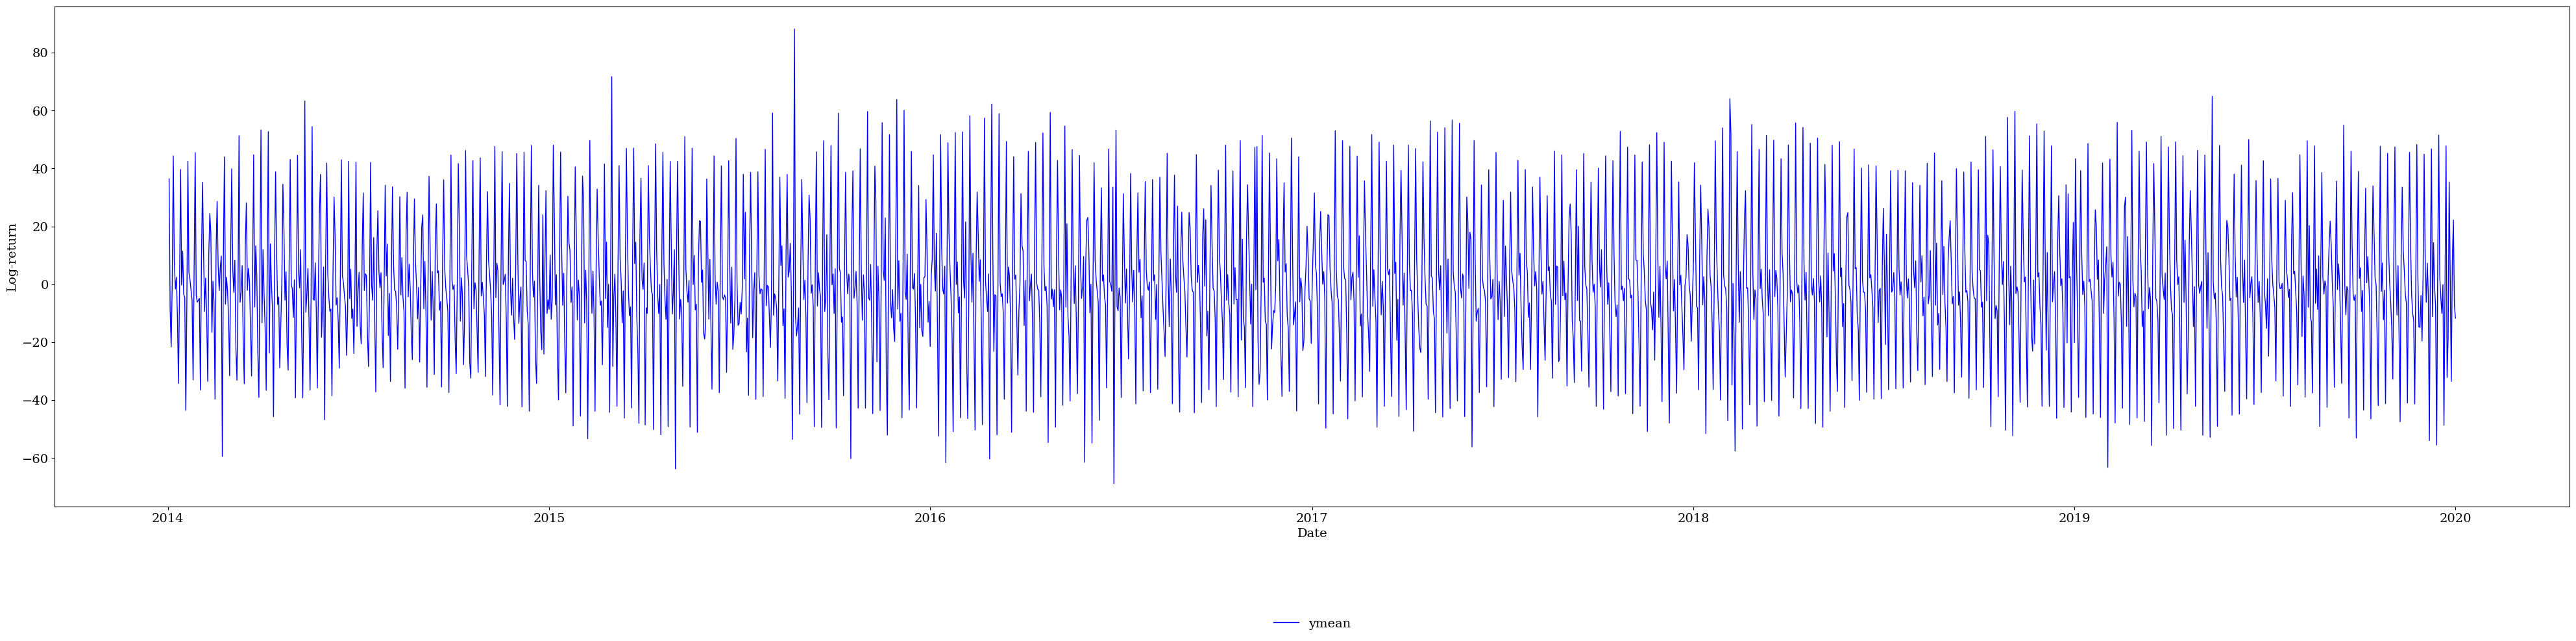

In [42]:
misc = get_data_formatted('misc')
# misc = make_pca(df=misc)
# misc['first_component'] = normalize_column(misc, 'first_component')
# plotter(misc)
for i in datas:
    i_df = get_data_formatted(i)
    # i_df = make_pca(df=i_df, i_name=i)
    # plotter(i_df)
    
    merged_df = pd.merge(misc, i_df, on='Date', how='outer')
    
    
    final_df = make_pca(df=merged_df, i_name='')

    print(final_df)
    plotter(final_df)
    final_df.to_csv(f"../../data/{i.upper()}/{i}_GTI.csv")